# Sales Prediction Using Python

In [1]:
!pip install -q -U --pre pycaret

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
# Dropping unnecessary columns

df.drop(df.columns[df.columns.str.contains('Unnamed: 0',case = False)],axis = 1, inplace = True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Exploratory Data Analysis

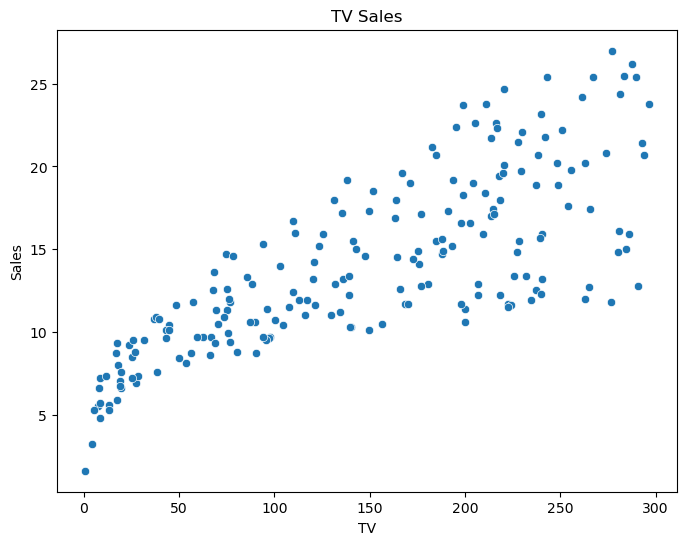

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x=df['TV'],y=df['Sales'])
plt.title('TV Sales')
plt.show()

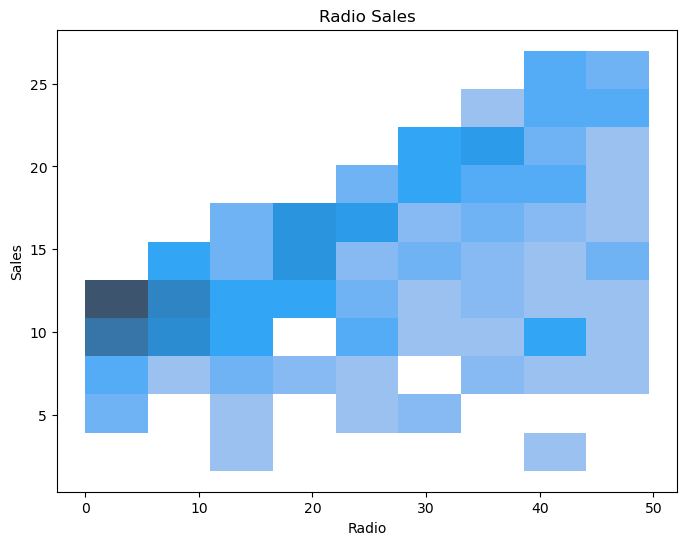

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x=df['Radio'], y=df['Sales'])
plt.title('Radio Sales')
plt.show()

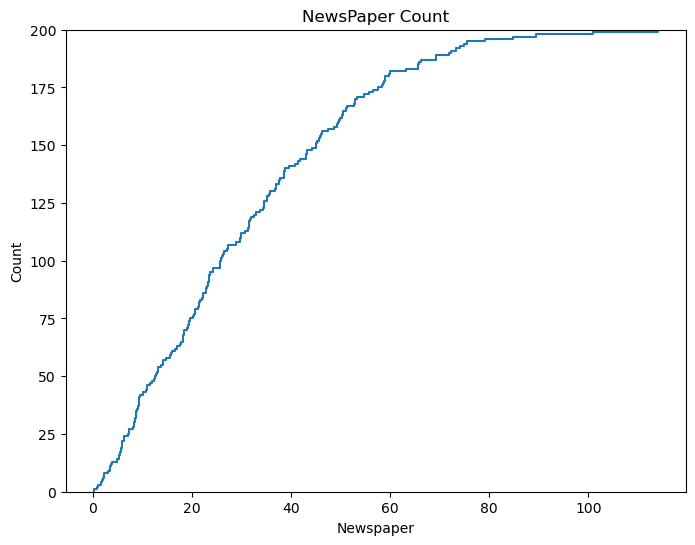

In [13]:
plt.figure(figsize=(8,6))
sns.ecdfplot(data=df, x=df['Newspaper'], stat='count')
plt.title('NewsPaper Count')
plt.show()

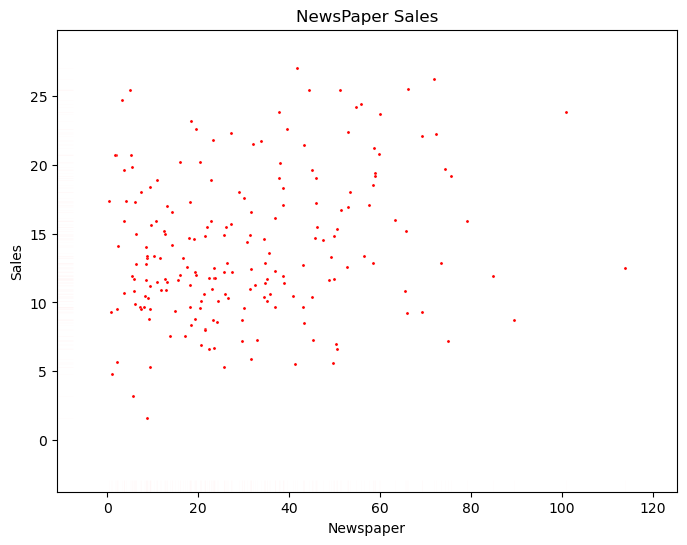

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x=df['Newspaper'], y=df['Sales'],color='red', s=5)
sns.rugplot(data=df, x=df['Newspaper'], y=df['Sales'],color='red', lw=1, alpha=.007)
plt.title('NewsPaper Sales')
plt.show()

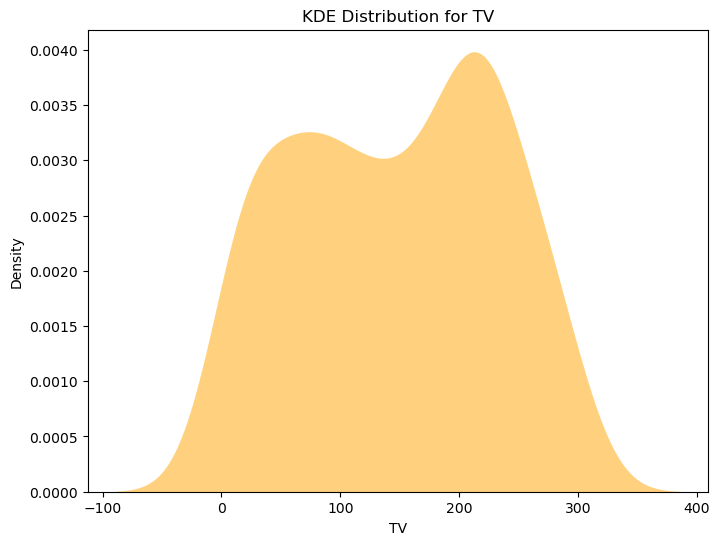

In [15]:
plt.figure(figsize=(8,6))
sns.kdeplot(
   data=df, x=df['TV'],
   fill=True, common_norm=False, color='orange',
   alpha=.5, linewidth=0,
)
sns.color_palette("magma", as_cmap=True)
plt.title('KDE Distribution for TV')
plt.show()

<Figure size 800x600 with 0 Axes>

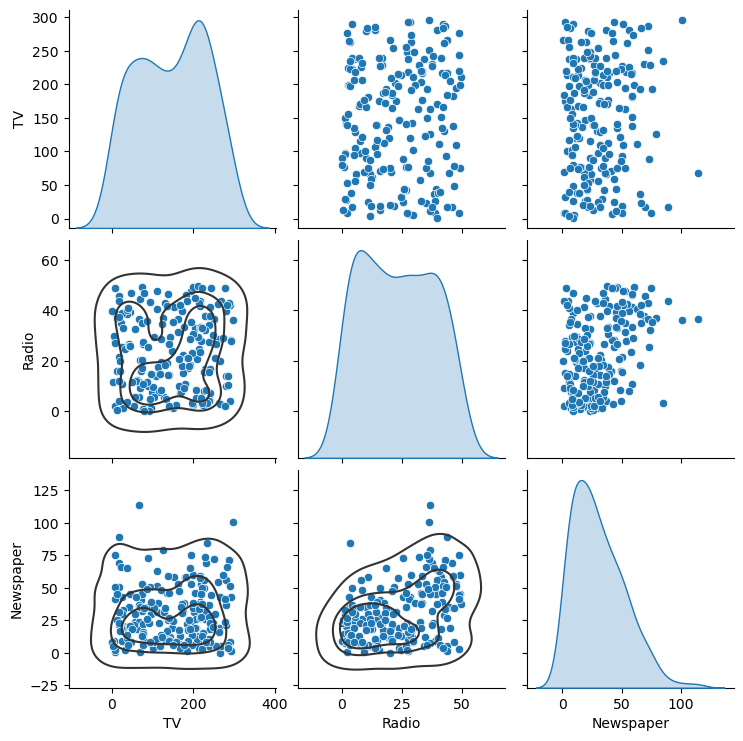

In [16]:
plt.figure(figsize=(8,6))
g = sns.pairplot(df[['TV', 'Radio', 'Newspaper']], diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

<Figure size 400x400 with 0 Axes>

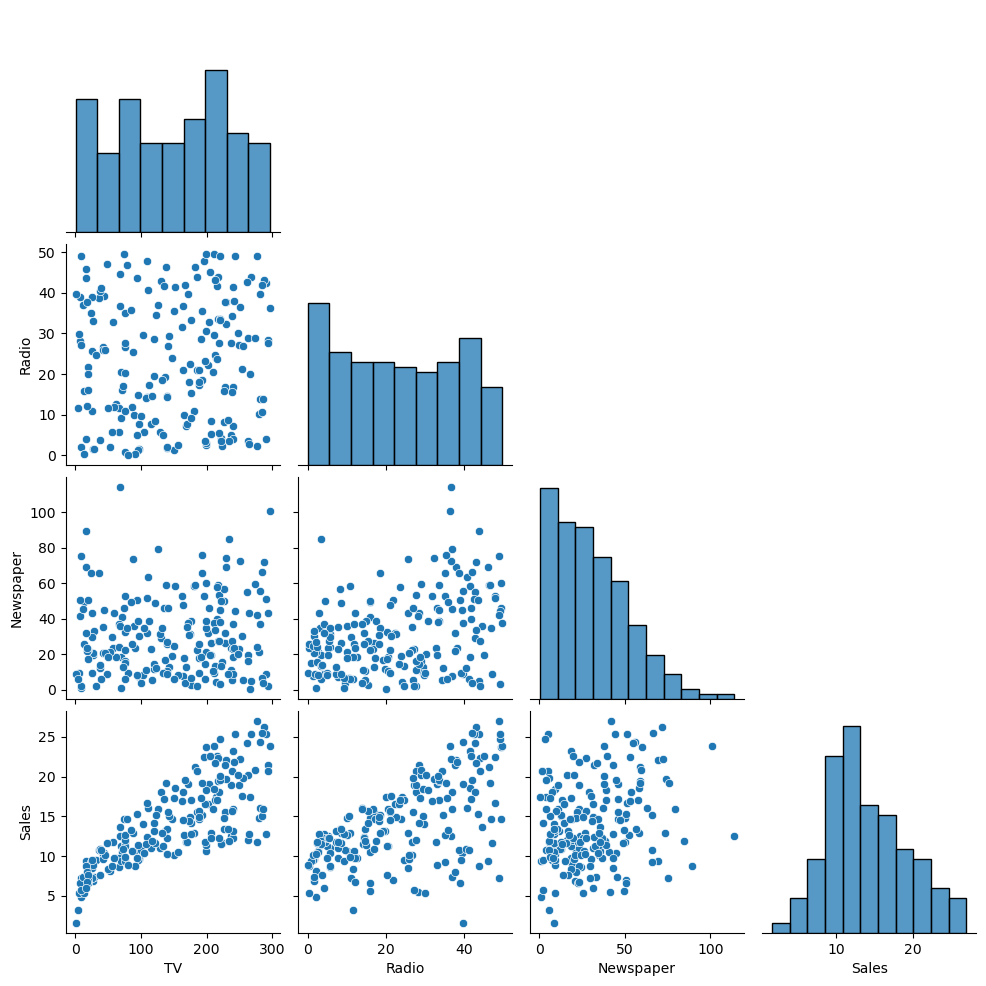

In [17]:
# Pairwise relationship between variables

plt.figure(figsize=(4,4))
sns.pairplot(df, corner=True)
sns.color_palette("rocket_r", as_cmap=True)
plt.show()

In [18]:
# Splitting Data

x = df.drop("Sales", axis=1)
y = df["Sales"]

In [19]:
from pycaret.regression import *
s = setup(data = df, target = 'Sales', session_id=101)

,Description,Value
0,Session id,101
1,Target,Sales
2,Target type,Regression
3,Original data shape,"(200, 4)"
4,Transformed data shape,"(200, 4)"
5,Transformed train set shape,"(140, 4)"
6,Transformed test set shape,"(60, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [20]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4246,0.4059,0.5743,0.9847,0.0618,0.0530,0.0450
gbr,Gradient Boosting Regressor,0.5995,0.7062,0.7989,0.9713,0.0771,0.0661,0.0430
rf,Random Forest Regressor,0.6481,0.8068,0.8499,0.9662,0.0837,0.0724,0.0450
dt,Decision Tree Regressor,0.9407,1.3325,1.1411,0.9447,0.1004,0.0894,0.0390
ada,AdaBoost Regressor,0.9249,1.3991,1.1638,0.9418,0.1068,0.0948,0.0440
lightgbm,Light Gradient Boosting Machine,0.8516,1.5259,1.1820,0.9361,0.1214,0.1016,0.1600
knn,K Neighbors Regressor,1.2476,2.7761,1.6241,0.8828,0.1276,0.1153,0.0410
lasso,Lasso Regression,1.3034,3.2757,1.7442,0.8580,0.1668,0.1518,0.2800
en,Elastic Net,1.3055,3.2966,1.7497,0.8570,0.1684,0.1529,0.0370
lr,Linear Regression,1.3078,3.3221,1.7562,0.8559,0.1707,0.1544,0.9260


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=101)

## Extra Trees Regressor:

### It is a type of ensemble learning technique that aggregates the results of different de-correlated decision trees similar to Random Forest Classifier.

### Decision Tree — are prune to overfitting, thus giving High Variance.

### Random Forest — to overcome the Decision Tree problems Random Forest was introduced. Thus gives Medium Variance.

### Extra Tree — when accuracy is more important than a generalized model. Thus gives Low Variance

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
print("Training Accuracy: ",lr.score(x_train,y_train))
print("Testing Accuracy: ",lr.score(x_test,y_test))

Training Accuracy:  0.9072183330817297
Testing Accuracy:  0.8576396745320893


In [23]:
y_pred_lr = lr.predict(x_test)
print("Predictions on Test Data: \n{}".format(y_pred_lr))

Predictions on Test Data: 
[10.0494569   7.43052335  6.97152143 24.16378667 12.00215643  6.54334645
 13.09526331 14.95879164 11.00528358 16.27234553 22.99324688  9.12188347
 10.33545333 15.39628185 11.60589932 12.11484332 18.60251172 10.81414474
 16.07541355 17.22753644 24.2342995   9.47711838 15.13960412 12.41064749
  5.67814427 15.22889947 12.21635459 20.94370559 13.28068231  9.16578351
 13.30285718 21.5770033  18.098111   21.15572322  6.69734039  6.15355714
  7.96280151 13.09426248 14.81032968  6.22020075 12.2799744   9.1817324
 15.04882696 16.26091437 17.16859664 13.32831849  3.69143664 12.43931798
 15.87909695  8.68626862]


In [24]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
print("Training Accuracy: ",dtr.score(x_train,y_train))
print("Testing Accuracy: ",dtr.score(x_test,y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.9211225742140358


In [25]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
print("Training Accuracy: ",rfr.score(x_train,y_train))
print("Testing Accuracy: ",rfr.score(x_test,y_test))

Training Accuracy:  0.9966935763596675
Testing Accuracy:  0.9659939918051492


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(x_train,y_train)
print("Training Accuracy: ",gbr.score(x_train,y_train))
print("Testing Accuracy: ",gbr.score(x_test,y_test))

Training Accuracy:  0.9988764562130608
Testing Accuracy:  0.96633467584432


In [27]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(random_state=0)
etr.fit(x_train,y_train)
print("Training Accuracy: ",etr.score(x_train,y_train))
print("Testing Accuracy: ",etr.score(x_test,y_test))

Training Accuracy:  0.9999999665229073
Testing Accuracy:  0.9809866362510317


In [28]:
y_pred_etr = etr.predict(x_test)
print("Predictions on Test Data: \n{}".format(y_pred_etr))

Predictions on Test Data: 
[10.907  9.223  9.318 25.372 12.136  8.695  8.054 12.886  8.825 16.503
 24.609 10.499 10.654 15.494 11.914 12.749 17.209  5.898 14.58  17.558
 25.547 10.366 15.516 12.952  8.613 15.835 12.595 22.082 11.193  8.373
 12.566 23.111 15.634 22.037  6.035  6.368  9.772 13.321 13.403  7.275
 10.364  8.97  15.737 16.271 17.231 13.812  4.843  9.188 16.685 10.488]


In [29]:
from numpy import arange
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
model = Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(x, y)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -1.279
Config: {'alpha': 0.34}


In [30]:
y_pred_Lasso = search.predict(x_test)
print("Predictions on Test Data: \n{}".format(y_pred_Lasso))

Predictions on Test Data: 
[ 9.94794416  7.41062017  7.15090033 24.09457642 12.1980056   6.59402398
 12.47699552 15.30081996 10.59434722 16.3408556  22.87062335  9.14880855
 10.60661083 15.48257069 11.43316547 12.11201118 18.83472471 10.37718809
 15.58794405 17.30567015 24.12907587  9.73080721 15.16292364 12.41408138
  5.78069162 15.04141933 12.39787855 20.74390528 13.65105378  8.90111877
 12.88584268 21.26674723 18.38777288 21.09811731  6.52976439  6.07271565
  7.92414311 13.24203222 14.3862638   6.15567139 11.84590852  8.98864682
 14.95852912 16.3861062  17.21066216 13.17639862  3.74637195 11.8823633
 15.58914367  8.80701975]


In [31]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
print("Training Accuracy: ",knn.score(x_train,y_train))
print("Testing Accuracy: ",knn.score(x_test,y_test))

Training Accuracy:  0.9357040987509307
Testing Accuracy:  0.9232510442247192


In [32]:
y_pred_knn = knn.predict(x_test)
print("Predictions on Test Data: \n{}".format(y_pred_knn))

Predictions on Test Data: 
[10.5   9.12  9.76 23.82 14.2   9.22  7.14 13.8   8.12 16.16 23.96 10.46
 11.84 14.88 11.14 12.36 19.26  6.34 13.24 16.02 24.3  11.64 16.18 12.76
  9.   14.14 12.62 20.7  12.36  7.3  12.82 20.24 14.54 20.54  6.46  6.46
 10.04 15.62 12.72  6.4   8.12  9.52 14.14 14.52 17.04 11.6   5.74  7.14
 17.52 11.18]


In [33]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators=[('m1',lr),('m2',dtr), ('m3',rfr), ('m4',gbr), ('m5',etr), ('m6',search), ('m7',knn)])
vr.fit(x,y)
print("Testing Accuracy: ",vr.score(x_test,y_test))

Testing Accuracy:  0.9840225395402467


In [34]:
vr.predict(x_test)

array([10.83280109,  8.19960763,  8.4578758 , 24.931095  , 12.18014596,
        8.09693083,  8.83551573, 13.76710029,  9.46045841, 16.39661271,
       23.81537381, 10.09661481, 10.61462776, 15.59725358, 11.65058759,
       12.78088833, 17.79389522,  4.99814898, 14.75953663, 17.1224056 ,
       25.28149361, 10.27654869, 15.05884818, 12.7954453 ,  7.52489678,
       15.15996895, 12.51229449, 21.92272692, 12.23008855,  8.31851782,
       12.49489666, 22.58376844, 16.57701941, 21.57034841,  6.08523078,
        6.53785289,  9.20693054, 13.3074051 , 13.78052641,  6.87540404,
       10.91869487,  9.30462447, 15.12392265, 16.26636982, 17.18091579,
       13.49527141,  4.59266103,  9.62236756, 16.03494267, 10.04367163])